In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix 

In [219]:
dataset = pd.read_csv('../Data/mushrooms.csv') # 데이터 가져오기

dataset_features = dataset.drop('class', axis=1) # feature
dataset_target = dataset['class'] # target

<AxesSubplot:>

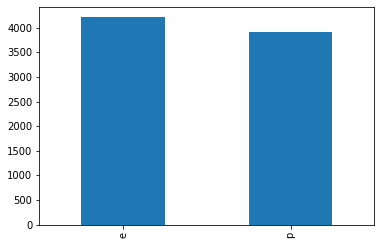

In [222]:
dataset['class'].value_counts().plot(kind = 'bar') # Over/Under Sampling 해야될지 판단 # E, P 가 균형을 이루니 그냥 냅두자

In [224]:
train_features, test_features, train_target, test_target = train_test_split(dataset_features, dataset_target, test_size = 0.2, random_state= 1025) # train, test 분리
print("shape before one hot encoding : ",train_features.shape, test_features.shape, train_target.shape, test_target.shape) # train, test shape 확인

train_features = pd.get_dummies(train_features) # feature selection 을 위한 One - Hot - Encoding 
test_features = pd.get_dummies(test_features) # feature 들의 중요성을 판단할 것이니 Drop_first = False
print("shape after one hot encoding : ", train_features.shape, test_features.shape, train_target.shape, test_target.shape) # One - Hot - Encoding 후 shape

shape before one hot encoding :  (6499, 22) (1625, 22) (6499,) (1625,)
shape after one hot encoding :  (6499, 117) (1625, 117) (6499,) (1625,)


### 주의

* 하다보면 train, test feature 의 shape 가 일치하지 않을 때가 있다. <br>왜냐하면 특정 features 의 특정 value 가 매우 적어 split 을 할 때 test, train 에 동시에 반영되지 않기 때문이다.<br> shape 가 적절하게 만들어질때까지 random_state 를 조절하였다.

In [226]:
model = RandomForestClassifier() 
model.fit(train_features, train_target)

feat_importances = pd.Series(model.feature_importances_, index = train_features.columns) # feature_importance 확인
feat_importances

cap-shape_b    0.001485
cap-shape_c    0.000029
cap-shape_f    0.001042
cap-shape_k    0.000362
cap-shape_s    0.000176
                 ...   
habitat_l      0.001175
habitat_m      0.004064
habitat_p      0.003151
habitat_u      0.009318
habitat_w      0.000234
Length: 117, dtype: float64

In [227]:
feat_importances = feat_importances.nlargest(n=10) # 중요도가 높은 10개 선택

train_features = train_features[feat_importances.index] 
test_features = test_features[feat_importances.index]

In [213]:
feat_importances.index # 선택된 feature 확인

Index(['odor_n', 'odor_f', 'gill-size_b', 'gill-size_n',
       'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k',
       'gill-spacing_w', 'bruises_t', 'ring-type_p', 'bruises_f'],
      dtype='object')

In [217]:
def modeling(model, train_features = train_features, test_features = test_features): # 모델링
    model.fit(train_features, train_target)
    prediction = model.predict(test_features)
    accuaracy = round(cross_val_score(model, train_features, train_target, cv=5).mean()*100,2) # overfitting 줄이기 위한 교차 검증
    print("train set accuaracy : %f%%" %(accuaracy))
    return prediction, accuaracy

In [189]:
rf_pred = modeling(RandomForestClassifier()) # trainset 예측률 확인

train set accuaracy : 99.050000%


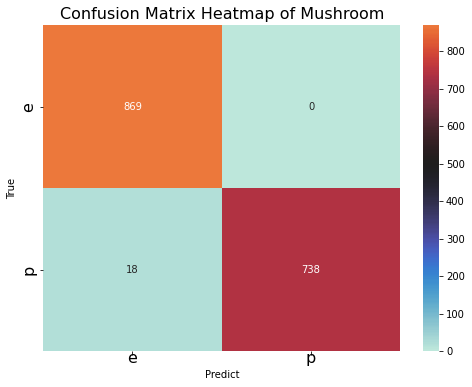

In [214]:
conf_mtrx = confusion_matrix(test_target, rf_pred[0], labels = ['e','p'])

plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Heatmap of Mushroom', fontsize = 16)

conf_heatmap = sns.heatmap(conf_mtrx, annot = True, fmt = "d", center = 500)

conf_heatmap.set_yticklabels(('e','p'), va = 'center', fontsize = '16')
conf_heatmap.set_xticklabels(('e','p'), va = 'center', fontsize = '16')
conf_heatmap.set_xlabel('Predict')
conf_heatmap.set_ylabel('True')

plt.show()

## 해석

* 실제 독버섯인데 식용버섯이라고 분류할 경우가 18 케이스이다. 추후 분류 문제를 더 공부한다면 왜 이런 결과가 나온것인지 학습할 예정이다.

In [215]:
print("test set accuaracy : %f%%" %(((conf_mtrx[0,0] + conf_mtrx[1,1])/conf_mtrx.sum())*100))
rf_pred = modeling(RandomForestClassifier())

test set accuaracy : 98.892308%
train set accuaracy : 99.050000%
